# Generación de modelos de aprendizaje

In [12]:
# librerias a utilizar
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importar el data set
dataset = pd.read_csv('/Users/alvarobolanos/Desktop/TC2004B/Reto Entrega 2/dataI2.csv')
dataset.head(10)

,PSINDER,PDER_SEGP,P18A24A_M,PROM_HNV,POCUPADA_F,PEA_F,P15PRI_CO,P15SEC_COM,P15SEC_CO,ic_asalud
0,0.182509,0.127477,0.023029,0.000002,0.216443,0.220011,0.080355,0.091784,0.192352,20.0
1,0.147276,0.465636,0.012671,0.000051,0.137166,0.138583,0.098126,0.116676,0.252523,16.5
2,0.203124,0.555931,0.010609,0.000046,0.160378,0.161991,0.132086,0.098730,0.228567,21.0
3,0.138059,0.378765,0.015706,0.000148,0.141235,0.142941,0.083471,0.121235,0.254294,17.6
4,0.210107,0.154169,0.018433,0.000016,0.208937,0.210977,0.092781,0.089587,0.186071,21.1
5,0.185913,0.248520,0.017084,0.000050,0.182995,0.185094,0.083092,0.102065,0.221362,21.1
6,0.198626,0.353327,0.015897,0.000043,0.186216,0.188011,0.079207,0.096882,0.208370,22.4
7,0.130758,0.616206,0.010469,0.000278,0.150963,0.152324,0.103120,0.116834,0.253664,8.1
8,0.149344,0.497176,0.012052,0.000118,0.128352,0.129953,0.109184,0.104025,0.229753,17.0
9,0.210377,0.371985,0.011317,0.000126,0.131828,0.133074,0.110440,0.127032,0.259723,23.0


In [13]:
dataset.describe()

,PSINDER,PDER_SEGP,P18A24A_M,PROM_HNV,POCUPADA_F,PEA_F,P15PRI_CO,P15SEC_COM,P15SEC_CO,ic_asalud
count,2469.000000,2469.000000,2469.000000,2.469000e+03,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000
mean,0.241251,0.508301,0.012334,7.098557e-04,0.148426,0.149944,0.129095,0.087059,0.181706,25.106845
std,0.108190,0.216284,0.006112,1.743043e-03,0.052390,0.052713,0.038682,0.021673,0.043923,12.450740
min,0.010399,0.011161,0.000000,9.570757e-07,0.009719,0.009719,0.006567,0.007197,0.016127,1.100000
25%,0.162337,0.341537,0.007835,6.861547e-05,0.111218,0.112670,0.103120,0.071622,0.150389,16.100000
50%,0.226339,0.529593,0.011496,1.875666e-04,0.153759,0.154988,0.123563,0.085420,0.178947,23.200000
75%,0.306236,0.682927,0.016171,5.951256e-04,0.188285,0.189687,0.147063,0.101964,0.212752,32.800000
max,0.838574,0.968802,0.054466,3.901235e-02,0.305657,0.311687,0.413905,0.177874,0.329718,83.900000


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PSINDER     2469 non-null   float64
 1   PDER_SEGP   2469 non-null   float64
 2   P18A24A_M   2469 non-null   float64
 3   PROM_HNV    2469 non-null   float64
 4   POCUPADA_F  2469 non-null   float64
 5   PEA_F       2469 non-null   float64
 6   P15PRI_CO   2469 non-null   float64
 7   P15SEC_COM  2469 non-null   float64
 8   P15SEC_CO   2469 non-null   float64
 9   ic_asalud   2469 non-null   float64
dtypes: float64(10)
memory usage: 193.0 KB


In [15]:
dataset.shape

(2469, 10)

## Modelos a utilizar:
<ul>
<li>Metodos de shirnkkage</li>
<ol>
<li>Regresión Ridge</li>
<li>Regresión Ridge</li>
<li>Elastic net</li>
</ol>
<li>Modelos basados en arboles</li>
<ol>
<li>DecisionTreeRegressor</li>
<li>GradientBoostingRegressor</li>
<li>Random Forest</li>
<li>ExtraTreesRegressor</li>
<li>XGBRegressor</li>
</ol>
<li>Support vector machine</li>
<ol>
<li>SVR</li>
</ol>
</ul>

## Entrenar modelos y mostrar resultados

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error


# Variables de decisión y variable a predecir
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values.reshape(-1, 1)
# normalizar y
# y_scaler = MinMaxScaler()
# y = y_scaler.fit_transform(y)

# División en conjunto de entrenamiento y testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Definir modelos
scaler = MinMaxScaler()
modelos = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'DecisionTree': DecisionTreeRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'RandomForest': RandomForestRegressor(),
    'ExtraTrees': ExtraTreesRegressor(),
    'XGB': XGBRegressor(),
    'SVR': SVR()  
}

# # Imprimir parametros de los modelos
# for nombre, modelo in modelos.items():
#     print(f"Modelo: {nombre}")
#     print(modelo.get_params())
#     print()

# Entrenar y evaluar modelos
resultados = []
resultados_entrenamiento = []
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train.ravel())  # ravel() para evitar warnings en algunos modelos
    y_pred = modelo.predict(X_test)
    resultados.append({
        'Modelo': nombre,
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': root_mean_squared_error(y_test, y_pred)

    })
    y_pred_entrenamiento = modelo.predict(X_train)
    resultados_entrenamiento.append({
        'Modelo': nombre,
        'MSE': mean_squared_error(y_train, y_pred_entrenamiento),
        'R2': r2_score(y_train, y_pred_entrenamiento),
        'MAE': mean_absolute_error(y_train, y_pred_entrenamiento),
        'RMSE': root_mean_squared_error(y_train, y_pred_entrenamiento)
    })
    print(f"{nombre}: R2={resultados[-1]['R2']:.4f}, MSE={resultados[-1]['MSE']:.4f}, MAE={resultados[-1]['MAE']:.4f}, RMSE={resultados[-1]['RMSE']:.4f}")

# Convertir resultados en DataFrame
resultados_df = pd.DataFrame(resultados).sort_values(by='R2', ascending=False)
resultados_df_entrenamiento = pd.DataFrame(resultados_entrenamiento).sort_values(by='R2', ascending=False)


Ridge: R2=0.8170, MSE=29.4268, MAE=3.6718, RMSE=5.4246
Lasso: R2=0.2699, MSE=117.4061, MAE=8.5038, RMSE=10.8354
ElasticNet: R2=0.0385, MSE=154.6191, MAE=9.7849, RMSE=12.4346
DecisionTree: R2=0.6656, MSE=53.7693, MAE=4.7417, RMSE=7.3328
GradientBoosting: R2=0.8132, MSE=30.0326, MAE=3.5576, RMSE=5.4802
RandomForest: R2=0.8040, MSE=31.5194, MAE=3.6101, RMSE=5.6142
ExtraTrees: R2=0.8017, MSE=31.8939, MAE=3.6846, RMSE=5.6475
XGB: R2=0.7861, MSE=34.3992, MAE=3.7892, RMSE=5.8651
SVR: R2=0.7774, MSE=35.7972, MAE=3.7802, RMSE=5.9831


## Evaluación de modelos de aprendizaje

## Resultados sobre datos de prueba

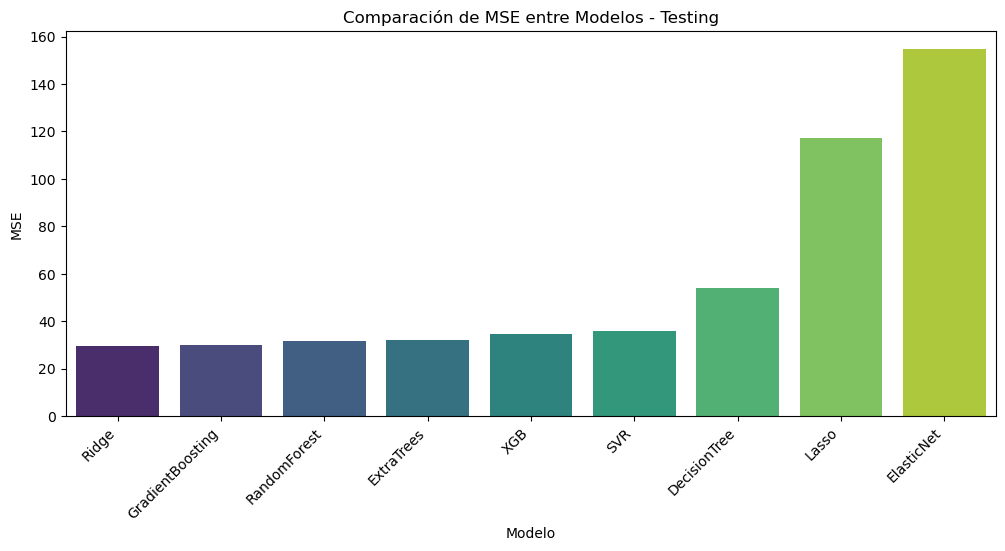

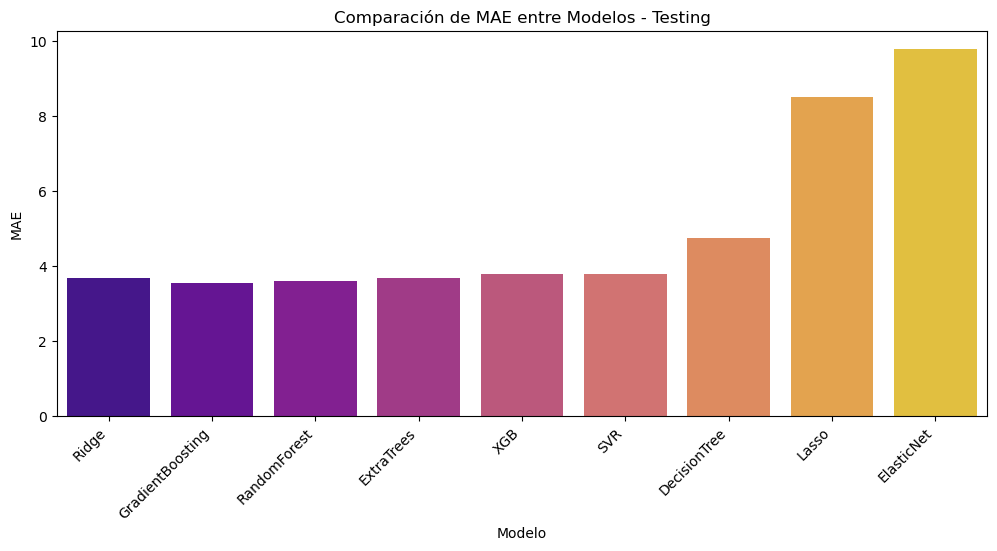

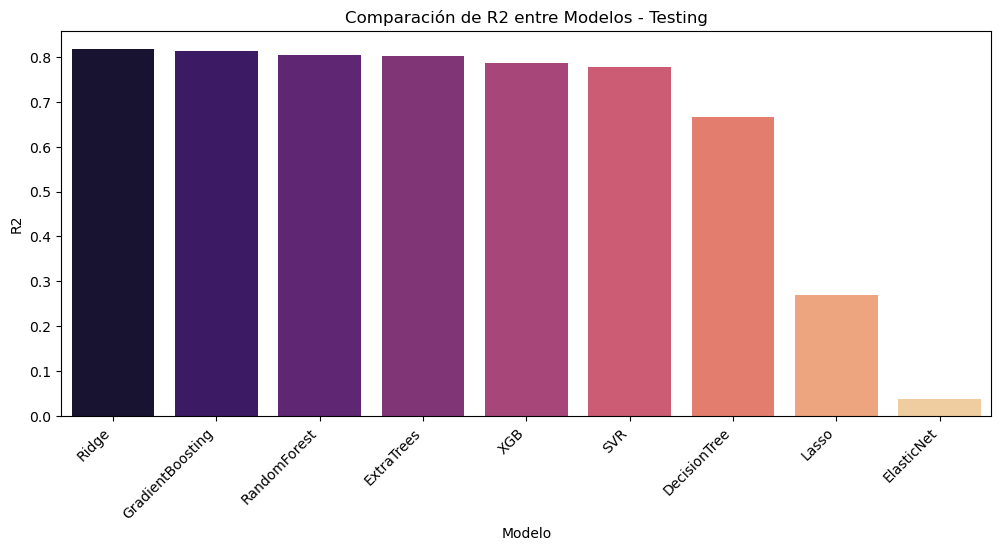

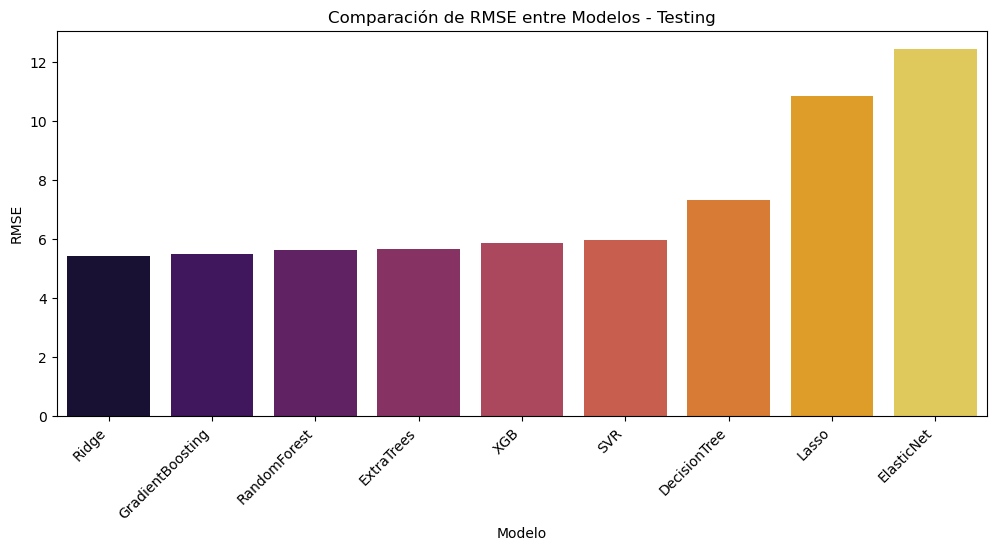

In [17]:
# Gráficos
plt.figure(figsize=(12, 5))
sns.barplot(x='Modelo', y='MSE', data=resultados_df, palette='viridis', hue='Modelo')
plt.xticks(rotation=45, ha="right")
plt.title('Comparación de MSE entre Modelos - Testing')
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x='Modelo', y='MAE', data=resultados_df, palette='plasma', hue='Modelo')
plt.xticks(rotation=45, ha="right")
plt.title('Comparación de MAE entre Modelos - Testing')
plt.show()


plt.figure(figsize=(12, 5))
sns.barplot(x='Modelo', y='R2', data=resultados_df, palette='magma', hue='Modelo')
plt.xticks(rotation=45, ha="right")
plt.title('Comparación de R2 entre Modelos - Testing')
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x='Modelo', y='RMSE', data=resultados_df, palette='inferno', hue='Modelo')
plt.xticks(rotation=45, ha="right")
plt.title('Comparación de RMSE entre Modelos - Testing')
plt.show()

## Resultados sobre datos de entrenamiento

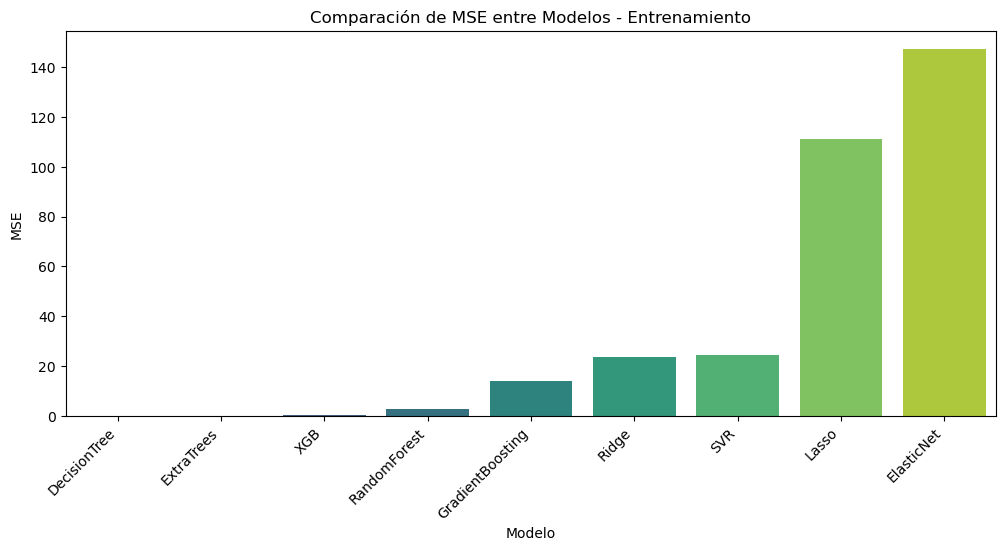

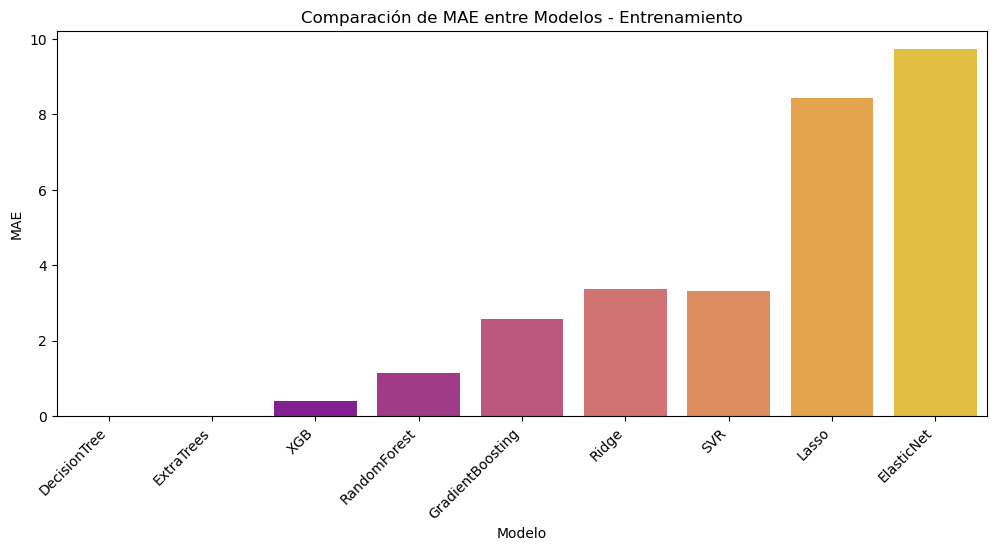

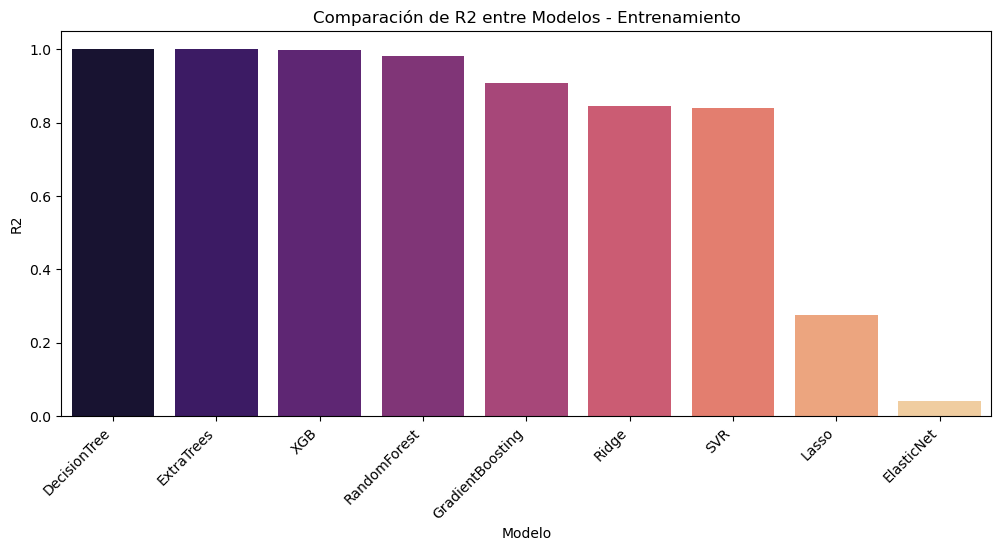

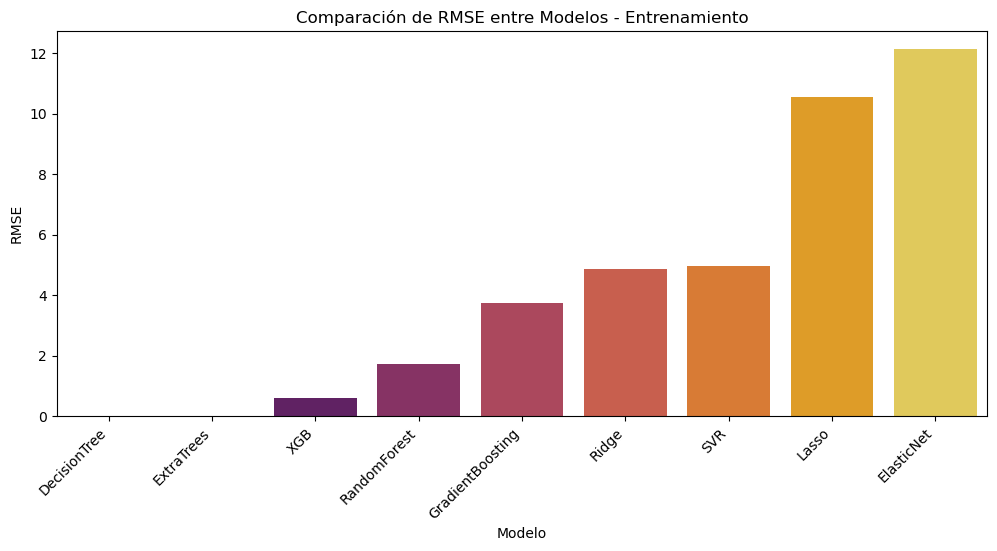

In [18]:
# Gráficos
plt.figure(figsize=(12, 5))
sns.barplot(x='Modelo', y='MSE', data=resultados_df_entrenamiento, palette='viridis', hue='Modelo')
plt.xticks(rotation=45, ha="right")
plt.title('Comparación de MSE entre Modelos - Entrenamiento')
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x='Modelo', y='MAE', data=resultados_df_entrenamiento, palette='plasma', hue='Modelo')
plt.xticks(rotation=45, ha="right")
plt.title('Comparación de MAE entre Modelos - Entrenamiento')
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x='Modelo', y='R2', data=resultados_df_entrenamiento, palette='magma', hue='Modelo')
plt.xticks(rotation=45, ha="right")
plt.title('Comparación de R2 entre Modelos - Entrenamiento')
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x='Modelo', y='RMSE', data=resultados_df_entrenamiento, palette='inferno', hue='Modelo')
plt.xticks(rotation=45, ha="right")
plt.title('Comparación de RMSE entre Modelos - Entrenamiento')
plt.show()

## Validación cruzada

In [19]:
# Validación cruzada 
cv_r2_resultados = []
cv_mse_resultados = []
cv_mae_resultados = []
cv_rmse_resultados = []
for nombre, modelo in modelos.items():
    r2_scores = cross_val_score(modelo, X_train, y_train.ravel(), cv=5, scoring='r2')
    mse_scores = cross_val_score(modelo, X_train, y_train.ravel(), cv=5, scoring='neg_mean_squared_error')
    mae_scores = cross_val_score(modelo, X_train, y_train.ravel(), cv=5, scoring='neg_mean_absolute_error')
    rmse_scores = cross_val_score(modelo, X_train, y_train.ravel(), cv=5, scoring='neg_root_mean_squared_error')
    cv_r2_resultados.append({
        'Modelo': nombre,
        'R2 Medio': r2_scores.mean(),
        'R2 Std': r2_scores.std()
    })
    cv_mse_resultados.append({
        'Modelo': nombre,
        'MSE Medio': mse_scores.mean(),
        'MSE Std': mse_scores.std()
    })
    cv_mae_resultados.append({
        'Modelo': nombre,
        'MAE Medio': mae_scores.mean(),
        'MAE Std': mae_scores.std()
    })
    cv_rmse_resultados.append({
        'Modelo': nombre,
        'RMSE Medio': rmse_scores.mean(),
        'RMSE Std': rmse_scores.std()
    })
    print(f"{nombre}: R2 Medio={r2_scores.mean():.4f} (+/- {r2_scores.std():.4f})")

# Convertir resultados en DataFrame
cv_r2_resultados_df = pd.DataFrame(cv_r2_resultados).sort_values(by='R2 Medio', ascending=False)
cv_mse_resultados_df = pd.DataFrame(cv_mse_resultados).sort_values(by='MSE Medio', ascending=False)
cv_mae_resultados_df = pd.DataFrame(cv_mae_resultados).sort_values(by='MAE Medio', ascending=False)
cv_rmse_resultados_df = pd.DataFrame(cv_rmse_resultados).sort_values(by='RMSE Medio', ascending=False)


Ridge: R2 Medio=0.8446 (+/- 0.0116)
Lasso: R2 Medio=0.2732 (+/- 0.0226)
ElasticNet: R2 Medio=0.0378 (+/- 0.0041)
DecisionTree: R2 Medio=0.7272 (+/- 0.0296)
GradientBoosting: R2 Medio=0.8645 (+/- 0.0132)
RandomForest: R2 Medio=0.8627 (+/- 0.0175)
ExtraTrees: R2 Medio=0.8544 (+/- 0.0178)
XGB: R2 Medio=0.8466 (+/- 0.0113)
SVR: R2 Medio=0.8351 (+/- 0.0114)


### Resultados validación cruzada

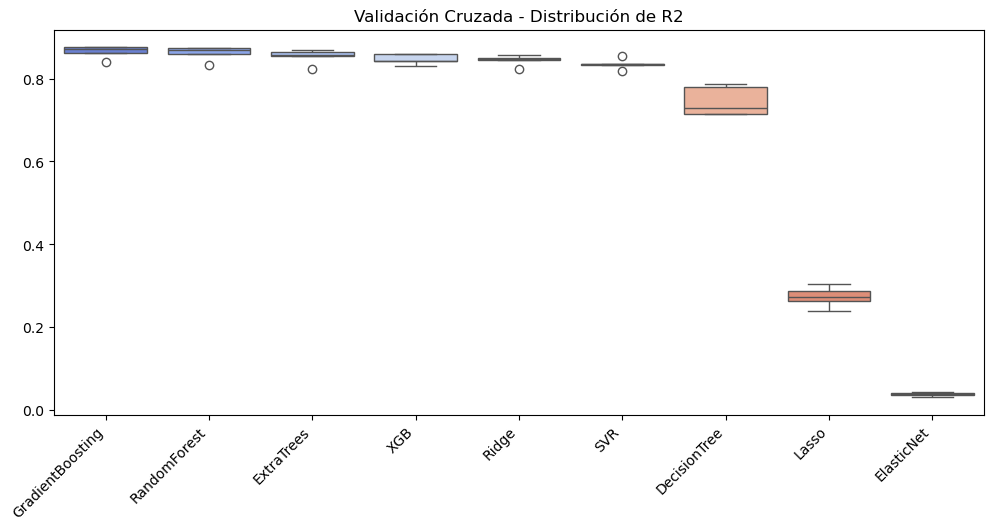

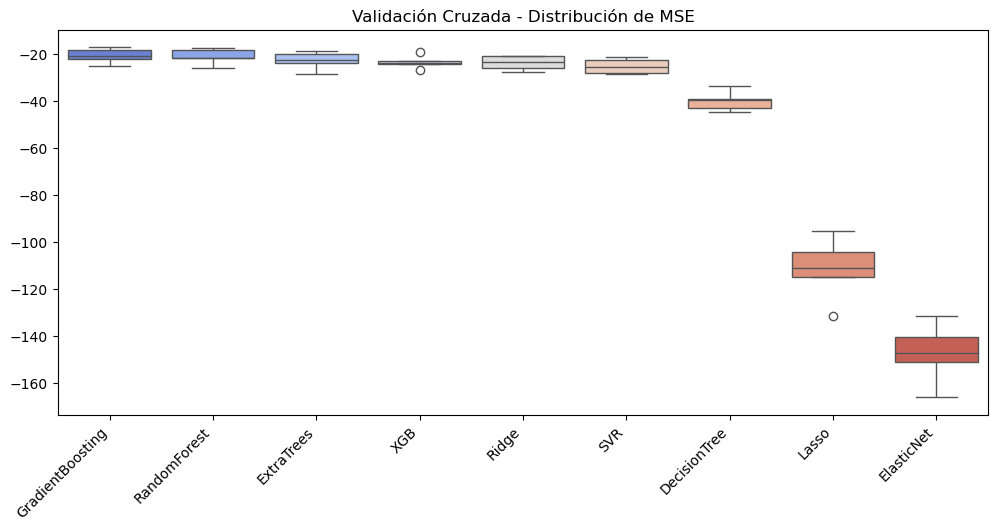

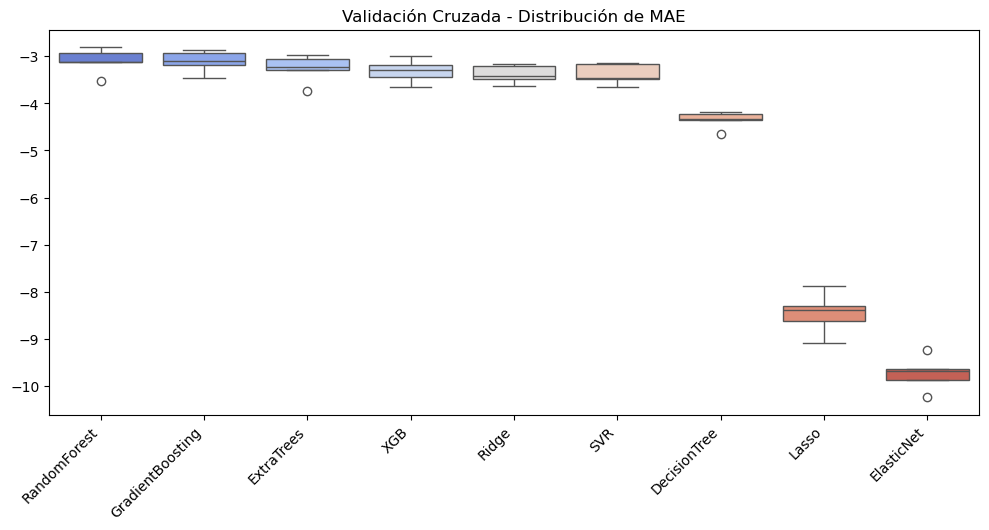

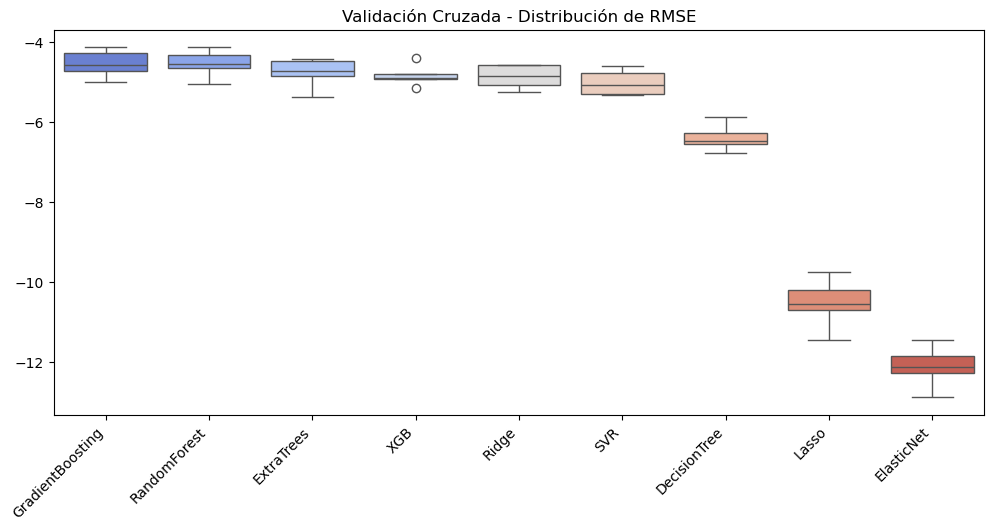

In [20]:
# Gráfico de validación cruzada de boxplot

plt.figure(figsize=(12, 5))
sns.boxplot(data=[cross_val_score(modelos[n], X_train, y_train.ravel(), cv=5, scoring='r2') for n in cv_r2_resultados_df['Modelo']],
            palette='coolwarm')
plt.xticks(range(len(cv_r2_resultados_df['Modelo'])), cv_r2_resultados_df['Modelo'], rotation=45, ha="right")
plt.title('Validación Cruzada - Distribución de R2')
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(data=[cross_val_score(modelos[n], X_train, y_train.ravel(), cv=5, scoring='neg_mean_squared_error') for n in cv_mse_resultados_df['Modelo']],
            palette='coolwarm')
plt.xticks(range(len(cv_mse_resultados_df['Modelo'])), cv_mse_resultados_df['Modelo'], rotation=45, ha="right")
plt.title('Validación Cruzada - Distribución de MSE')
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(data=[cross_val_score(modelos[n], X_train, y_train.ravel(), cv=5, scoring='neg_mean_absolute_error') for n in cv_mae_resultados_df['Modelo']],
            palette='coolwarm')
plt.xticks(range(len(cv_mae_resultados_df['Modelo'])), cv_mae_resultados_df['Modelo'], rotation=45, ha="right")
plt.title('Validación Cruzada - Distribución de MAE')
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(data=[cross_val_score(modelos[n], X_train, y_train.ravel(), cv=5, scoring='neg_root_mean_squared_error') for n in cv_rmse_resultados_df['Modelo']],
            palette='coolwarm')
plt.xticks(range(len(cv_rmse_resultados_df['Modelo'])), cv_rmse_resultados_df['Modelo'], rotation=45, ha="right")
plt.title('Validación Cruzada - Distribución de RMSE')
plt.show()

## Curva de aprendizaje

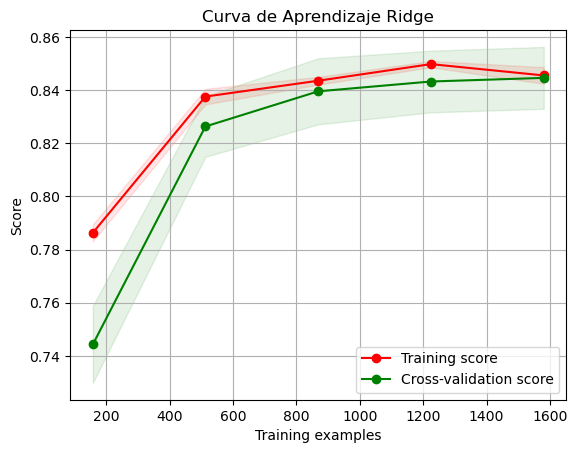

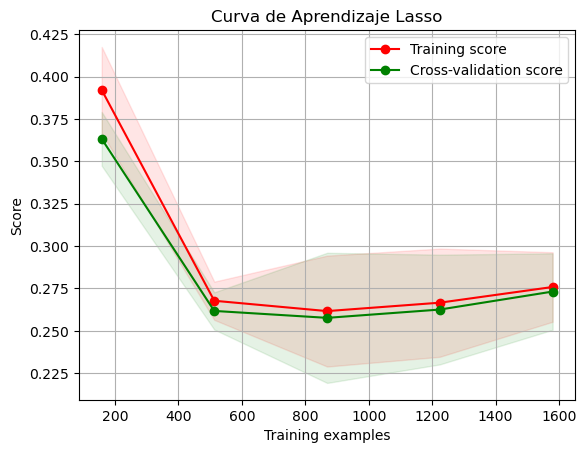

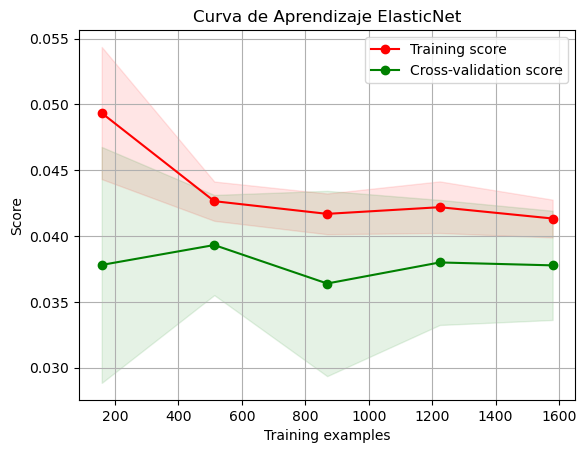

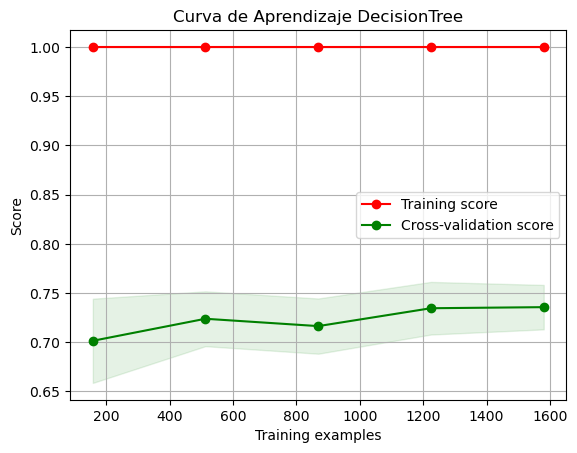

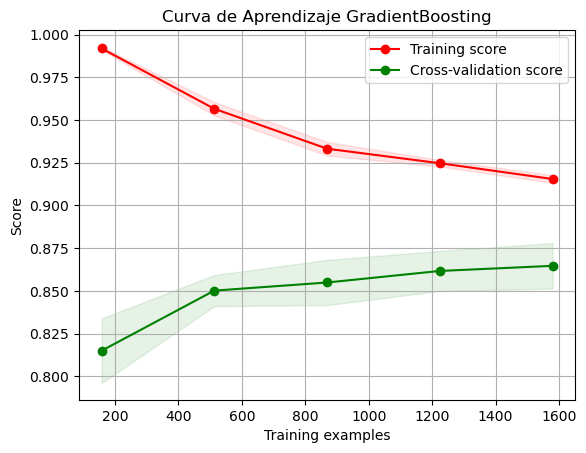

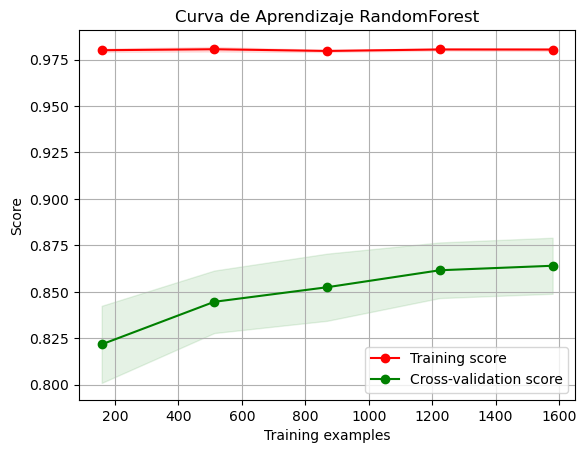

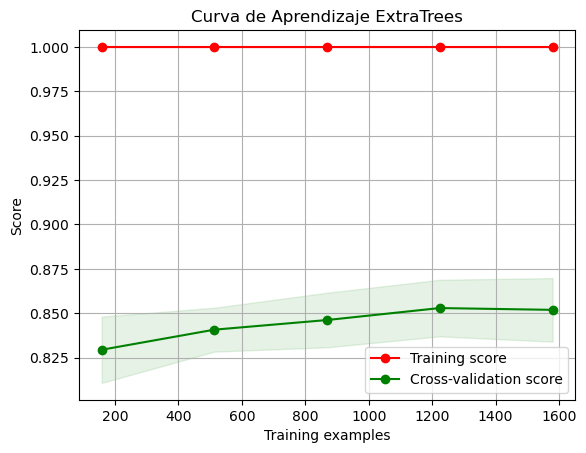

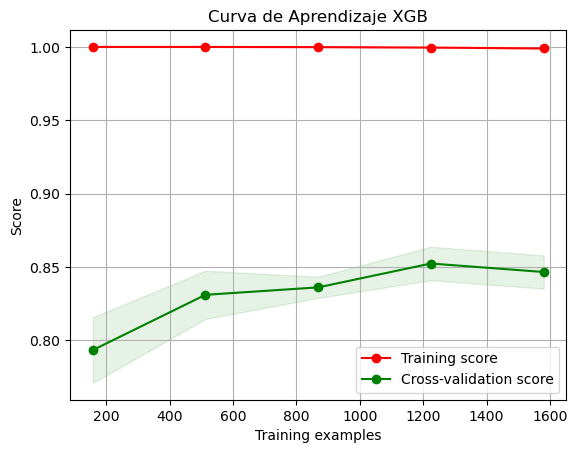

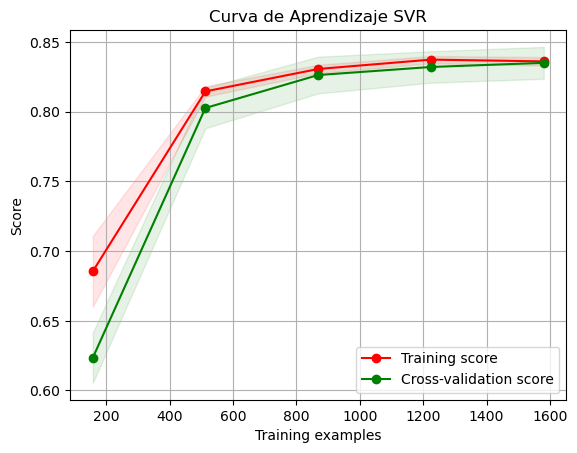

In [21]:
# Curva de aprendizaje
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='r2')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

for nombre, modelo in modelos.items():
    plot_learning_curve(modelo, f"Curva de Aprendizaje {nombre}", X_train, y_train.ravel(), cv=5, n_jobs=-1)
    plt.show()


## Ajuste de hiperparametros
Se seleccionaron los modelos Ridge regression y gradient boosting por su desempeños en las metricas presentadas

In [26]:
from sklearn.model_selection import GridSearchCV

randomForest_params = {'n_estimators': [100, 500, 1000],
                          'max_depth': [3, 7, 11],
                          'min_samples_split': [2, 5, 10],
                          'min_samples_leaf': [1, 2, 4],
                          'max_features': [None, 'sqrt', 'log2'],
                          'random_state': [0]}
randomForest = RandomForestRegressor()
randomForest_search = GridSearchCV(randomForest, randomForest_params, scoring='r2', cv=5, n_jobs=-1)
randomForest_search.fit(X_train, y_train.ravel())

gradientBoosting_params = {'n_estimators': [100, 500, 1000],
                            'learning_rate': [0.01, 0.1, 1],
                            'max_depth': [3, 5, 7],
                            'min_samples_split': [2, 5, 10],
                            'min_samples_leaf': [1, 2, 4],
                            'max_features': [None, 'sqrt', 'log2'],
                            'random_state': [0]}
gradientBoosting = GradientBoostingRegressor()
gradientBoosting_search = GridSearchCV(gradientBoosting, gradientBoosting_params, scoring='r2', cv=5, n_jobs=-1)
gradientBoosting_search.fit(X_train, y_train.ravel())

print("Mejor hiperparámetro para Ridge:", randomForest_search.best_params_)
print("Mejor R²:", randomForest_search.best_score_)

print("Mejor hiperparámetro para GradientBoosting:", gradientBoosting_search.best_params_)
print("Mejor R²:", gradientBoosting_search.best_score_)



KeyboardInterrupt: 

In [25]:
# Desempeño del modelo con los mejores hiperparámetros
randomForest_best = RandomForestRegressor(**randomForest_search.best_params_)
randomForest_best.fit(X_train, y_train.ravel())
y_pred = randomForest_best.predict(X_test)

print('Resultados con el mejor modelo Ridge')
print(f"R2: {r2_score(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred):.4f}")

gradientBoosting_best = GradientBoostingRegressor(**gradientBoosting_search.best_params_)
gradientBoosting_best.fit(X_train, y_train.ravel())
y_pred = gradientBoosting_best.predict(X_test)

print('Resultados con el mejor modelo GradientBoosting')
print(f"R2: {r2_score(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred):.4f}")

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'